
Importing the Dependencies

In [1812]:
pip install catboost

In [1813]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

# ML model
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

Data Collection and Processing

In [1814]:
# loading the dataset to pandas DataFrame
crop_reco_dataset = pd.read_csv('/content/Crop_recommendation.csv')

In [1815]:
type(crop_reco_dataset)

pandas.core.frame.DataFrame

In [1816]:
# first 5 rows of the dataframe
crop_reco_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [1817]:
# last 5 rows of the dataframe
crop_reco_dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2222,0,4,3,23.603016,0.396475,1.779833,14.937042,coffee
2223,1,5,4,3.603016,0.396475,3.779833,120.937042,coffee
2224,8,6,20,3.603016,0.396475,3.779833,120.937042,coffee
2225,0,6,16,3.603016,0.396475,3.779833,120.937042,coffee
2226,20,7,13,3.603016,0.396475,3.779833,120.937042,coffee


In [1818]:
# number of rows and columns
crop_reco_dataset.shape

(2227, 8)

In [1819]:
# the name of the columns of dataframe
crop_reco_dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [1820]:
# Describe the data
crop_reco_dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000
mean,50.604401,53.011226,47.892232,25.477649,71.132759,6.458756,104.383611
std,38.868119,32.994232,50.427686,5.289247,22.900184,0.793365,55.826765
min,0.000000,4.000000,3.000000,3.603016,0.396475,1.779833,14.937042
25%,21.000000,28.000000,20.000000,22.697190,60.172108,5.972052,64.836545
50%,37.000000,51.000000,32.000000,25.543597,80.525861,6.419537,95.426260
75%,85.000000,68.000000,48.000000,28.529712,89.840140,6.920171,126.766762
max,635.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [1821]:
# Describe the data with transpose
crop_reco_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2227.0,50.604401,38.868119,0.000000,21.000000,37.000000,85.000000,635.000000
P,2227.0,53.011226,32.994232,4.000000,28.000000,51.000000,68.000000,145.000000
K,2227.0,47.892232,50.427686,3.000000,20.000000,32.000000,48.000000,205.000000
temperature,2227.0,25.477649,5.289247,3.603016,22.697190,25.543597,28.529712,43.675493
humidity,2227.0,71.132759,22.900184,0.396475,60.172108,80.525861,89.840140,99.981876
ph,2227.0,6.458756,0.793365,1.779833,5.972052,6.419537,6.920171,9.935091
rainfall,2227.0,104.383611,55.826765,14.937042,64.836545,95.426260,126.766762,298.560117


In [1822]:
# getting imformation about dataset
crop_reco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2227 non-null   int64  
 1   P            2227 non-null   int64  
 2   K            2227 non-null   int64  
 3   temperature  2227 non-null   float64
 4   humidity     2227 non-null   float64
 5   ph           2227 non-null   float64
 6   rainfall     2227 non-null   float64
 7   label        2227 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 139.3+ KB


In [1823]:
# number of missing values in each column
crop_reco_dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

No missing values or null values in this dataframe,
For null values we have to replace or mean or median or delete

replacing the null values with mean of single column,
1. crop_reco_dataset['col_name'].fillna(crop_reco_dataset.col_name.mean(), inplace=True)

Data Visualization

Pairplot for Crop Recommendation Dataset


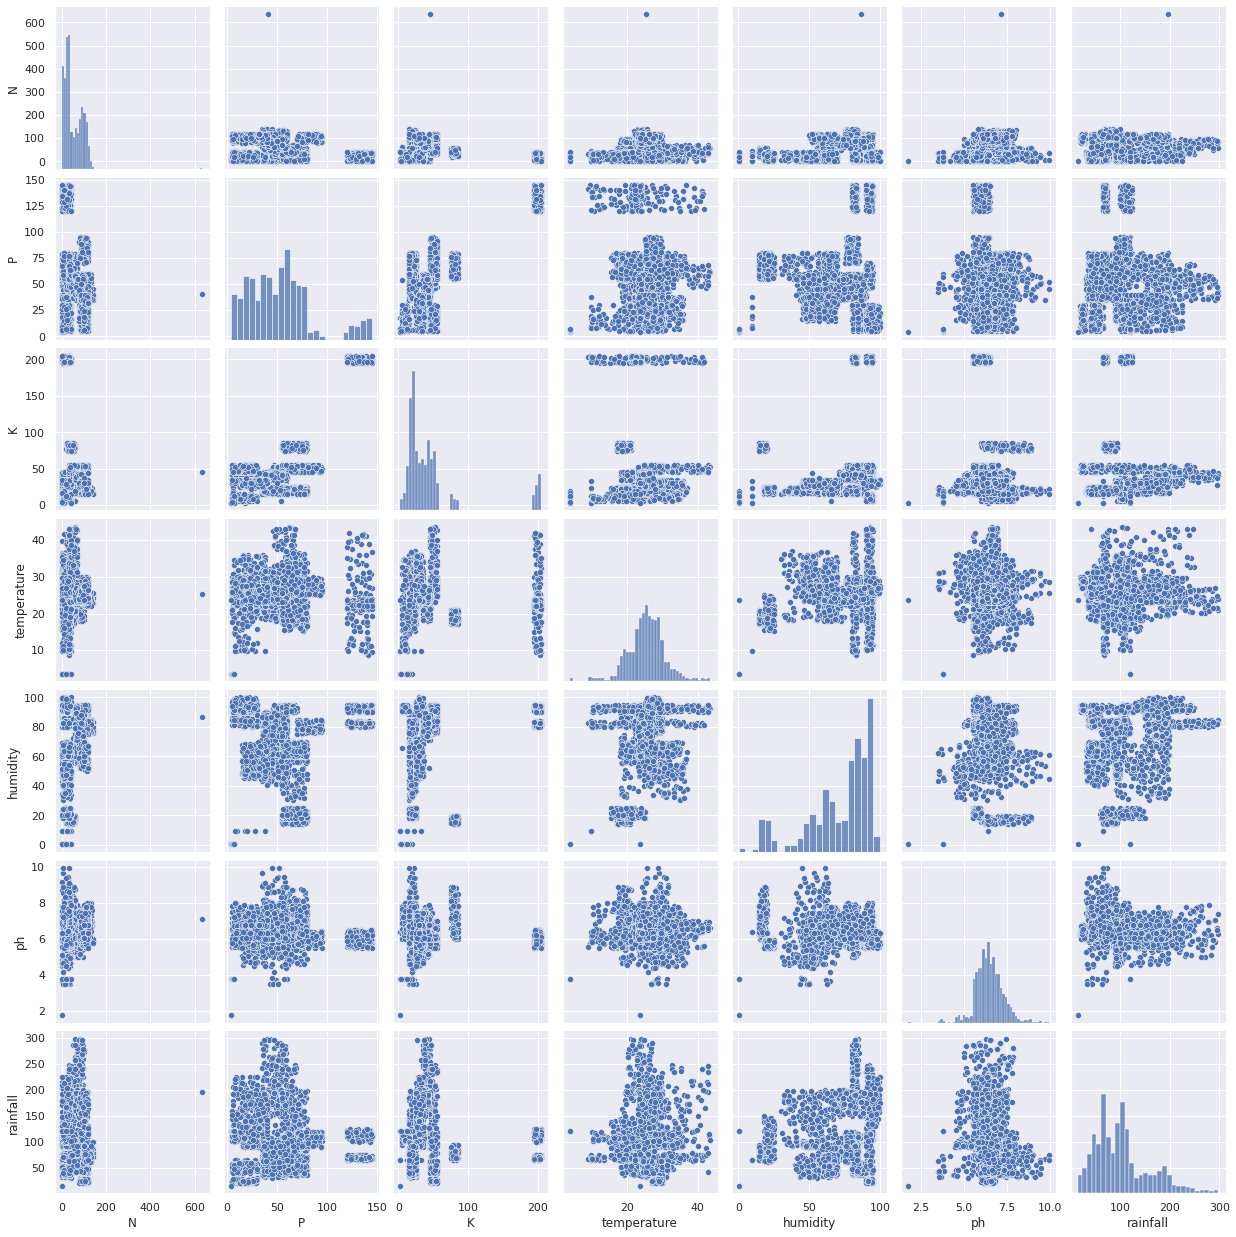

In [1824]:
# pairplot for Crop Recommendation Dataset
sns.pairplot(crop_reco_dataset)
print('Pairplot for Crop Recommendation Dataset')

Histplot in Crop Recommendation Dataset


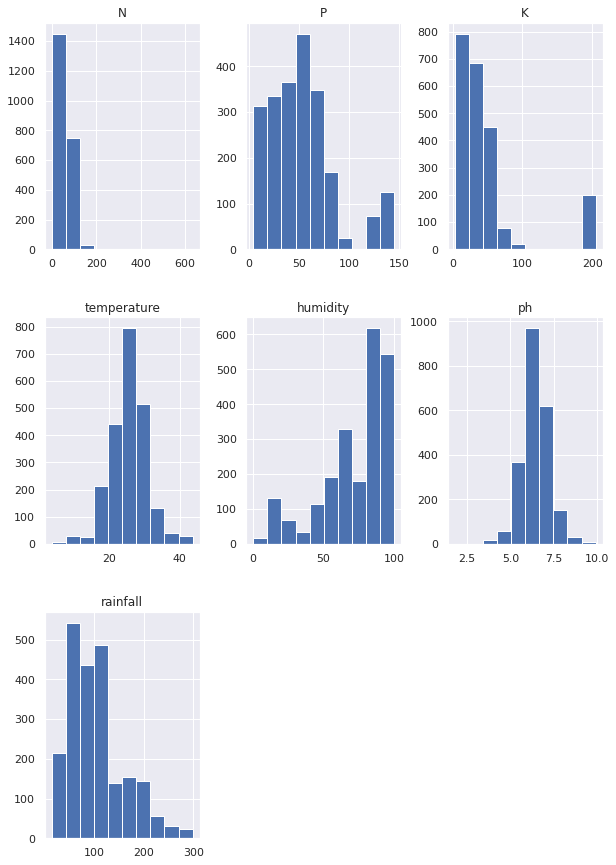

In [1825]:
sns.set(style="darkgrid") # hide graph line
crop_reco_dataset.hist(figsize=(10,15))
print('Histplot in Crop Recommendation Dataset')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



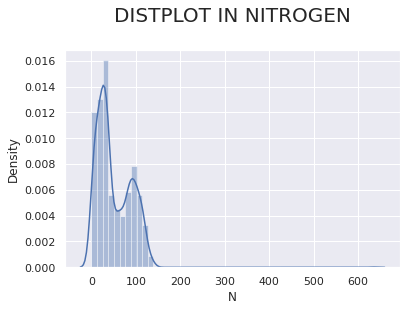

In [1826]:
# Nitrogen
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['N'])
title = 'Distplot in Nitrogen\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



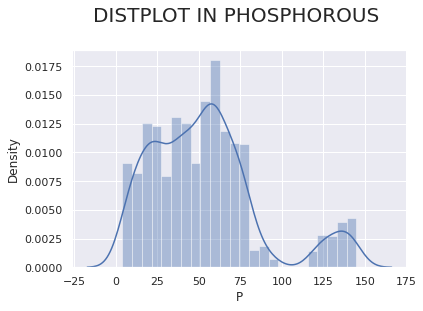

In [1827]:
# Phosphorous 
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['P'])
title = 'Distplot in Phosphorous \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



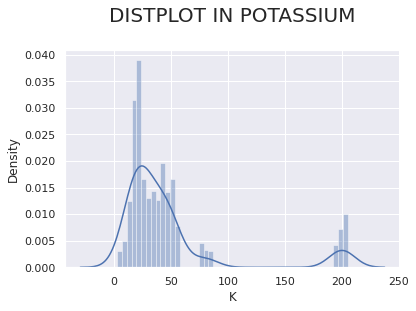

In [1828]:
# Potassium 
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['K'])
title = 'Distplot in Potassium\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



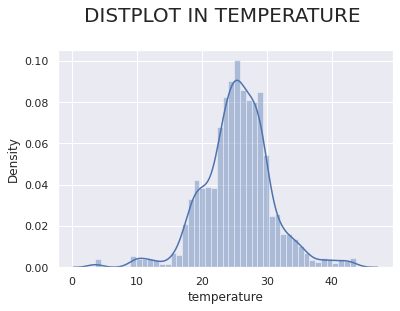

In [1829]:
# temperature 
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['temperature'])
title = 'Distplot in Temperature \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



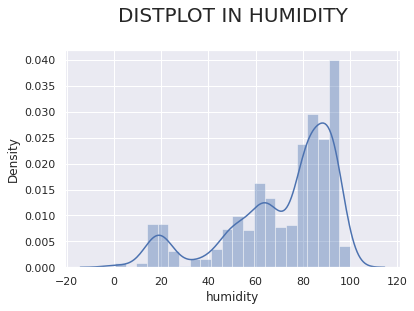

In [1830]:
# humidity
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['humidity'])
title = 'Distplot in Humidity\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



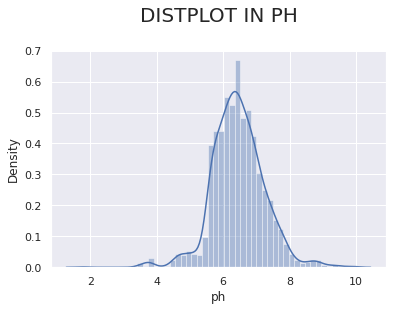

In [1831]:
# ph
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['ph'])
title = 'Distplot in Ph\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



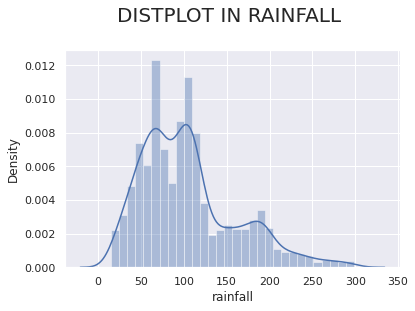

In [1832]:
# rainfall 
plt.figure(figsize=(6,4))
sns.distplot(crop_reco_dataset['rainfall'])
title = 'Distplot in Rainfall \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

Text(0.5, 1.0, 'Temperature vs Humidity of Crop Recommendation Dataset')

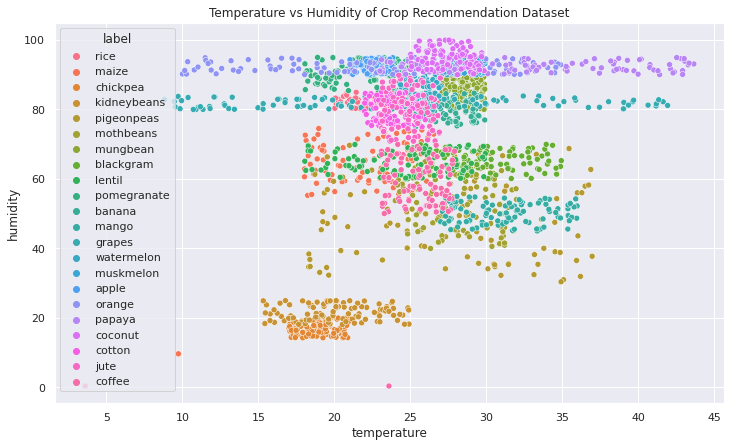

In [1833]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='temperature', y='humidity', data=crop_reco_dataset, hue='label')
plt.title('Temperature vs Humidity of Crop Recommendation Dataset')

Text(0.5, 1.0, 'Temperature vs Humidity of Crop Recommendation Dataset')

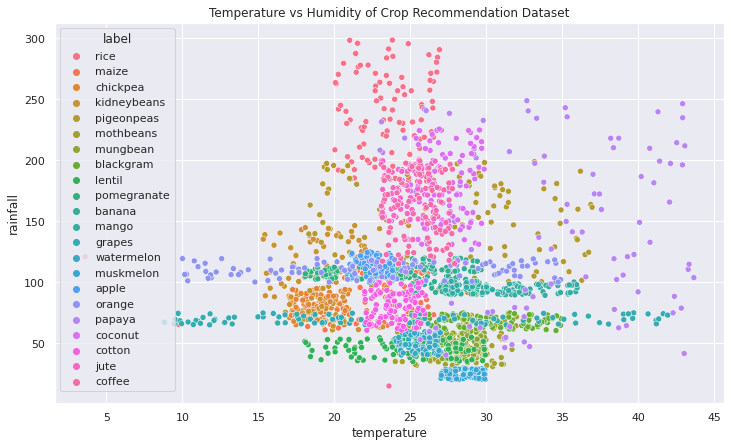

In [1834]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='temperature', y='rainfall', data=crop_reco_dataset, hue='label')
plt.title('Temperature vs Humidity of Crop Recommendation Dataset')

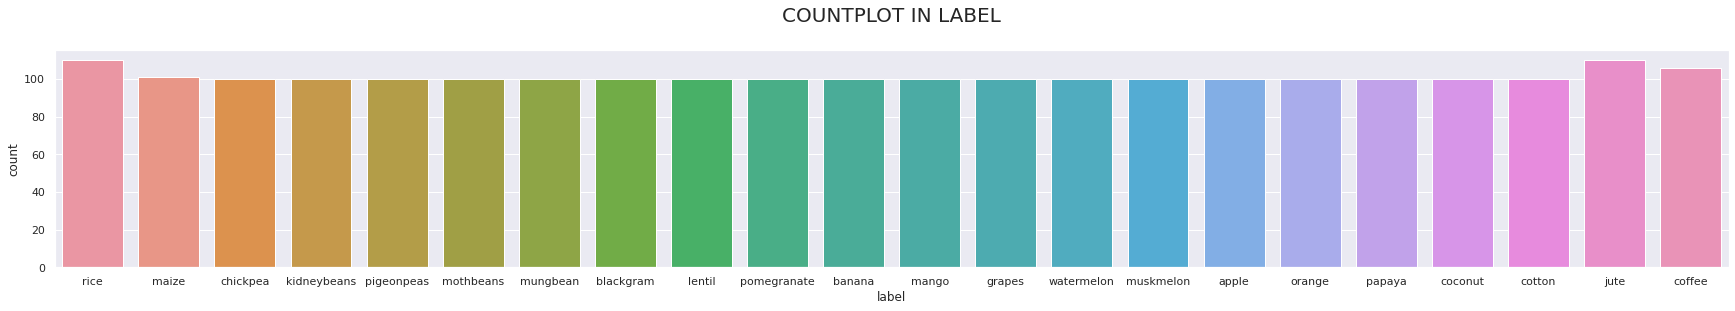

In [1835]:
# label
plt.figure(figsize=(30,4))
sns.countplot(x='label', data=crop_reco_dataset)
title = 'CountPlot in label\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [1836]:
crop_scatter = crop_reco_dataset[(crop_reco_dataset['label']=='rice') | 
                      (crop_reco_dataset['label']=='jute') | 
                      (crop_reco_dataset['label']=='cotton')|
                     (crop_reco_dataset['label']=='maize') |
                     (crop_reco_dataset['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Understanding the correlation between various features in the dataset

In [1837]:
correlation = crop_reco_dataset.corr()

In [1838]:
print(correlation)

                    N         P         K  ...  humidity        ph  rainfall
N            1.000000 -0.211808 -0.127256  ...  0.201507  0.109499  0.078424
P           -0.211808  1.000000  0.737254  ... -0.088626 -0.110941 -0.064252
K           -0.127256  0.737254  1.000000  ...  0.198018 -0.152744 -0.055042
temperature  0.044673 -0.088111 -0.134305  ...  0.261997  0.036911 -0.030543
humidity     0.201507 -0.088626  0.198018  ...  1.000000  0.041623  0.104267
ph           0.109499 -0.110941 -0.152744  ...  0.041623  1.000000 -0.099504
rainfall     0.078424 -0.064252 -0.055042  ...  0.104267 -0.099504  1.000000

[7 rows x 7 columns]


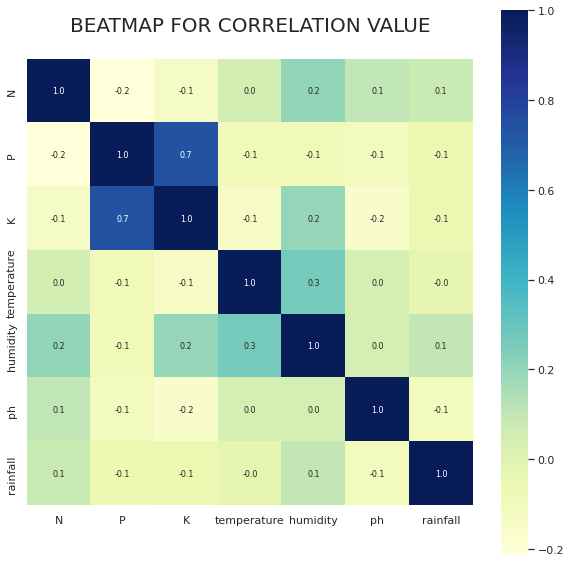

In [1839]:
# constructing a beatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='YlGnBu')
title = 'Beatmap for correlation value\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

List of various crops

In [1840]:
print("Number of various crops: ", len(crop_reco_dataset['label'].unique()))
print("List of crops: ", crop_reco_dataset['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [1841]:
# Label column values
crop_reco_dataset['label'].value_counts()

rice           110
jute           110
coffee         106
maize          101
apple          100
muskmelon      100
kidneybeans    100
banana         100
coconut        100
mungbean       100
mango          100
grapes         100
lentil         100
mothbeans      100
cotton         100
blackgram      100
pomegranate    100
orange         100
watermelon     100
papaya         100
chickpea       100
pigeonpeas     100
Name: label, dtype: int64

In [1842]:
crop_reco_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [1843]:
crop_reco_dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2222,0,4,3,23.603016,0.396475,1.779833,14.937042,coffee
2223,1,5,4,3.603016,0.396475,3.779833,120.937042,coffee
2224,8,6,20,3.603016,0.396475,3.779833,120.937042,coffee
2225,0,6,16,3.603016,0.396475,3.779833,120.937042,coffee
2226,20,7,13,3.603016,0.396475,3.779833,120.937042,coffee


replace Label data with values

In [1844]:
# convert categorical data to numerical values
crop_reco_dataset.replace({'label': {'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4,
                                     'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 
                                     'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 
                                     'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 
                                     'jute': 20, 'coffee': 21, 
                                     },}, inplace=True)

Label Encoding

In [1845]:
# encoder = LabelEncoder()

In [1846]:
# crop_reco_dataset['label'] = encoder.fit_transform(crop_reco_dataset['label'])

In [1847]:
crop_reco_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0


In [1848]:
crop_reco_dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2222,0,4,3,23.603016,0.396475,1.779833,14.937042,21
2223,1,5,4,3.603016,0.396475,3.779833,120.937042,21
2224,8,6,20,3.603016,0.396475,3.779833,120.937042,21
2225,0,6,16,3.603016,0.396475,3.779833,120.937042,21
2226,20,7,13,3.603016,0.396475,3.779833,120.937042,21


In [1849]:
# Label column values after level encoding
crop_reco_dataset['label'].value_counts()

20    110
0     110
21    106
1     101
16    100
2     100
4     100
6     100
8     100
10    100
12    100
14    100
17    100
15    100
19    100
3     100
5     100
7     100
9     100
11    100
13    100
18    100
Name: label, dtype: int64

In [1850]:
# noise = 0.1047*np.random.normal(100,1);
# crop_reco_dataset = crop_reco_dataset + noise

In [1851]:
print(crop_reco_dataset)

       N   P   K  temperature   humidity        ph    rainfall  label
0     90  42  43    20.879744  82.002744  6.502985  202.935536      0
1     85  58  41    21.770462  80.319644  7.038096  226.655537      0
2     60  55  44    23.004459  82.320763  7.840207  263.964248      0
3     74  35  40    26.491096  80.158363  6.980401  242.864034      0
4     78  42  42    20.130175  81.604873  7.628473  262.717340      0
...   ..  ..  ..          ...        ...       ...         ...    ...
2222   0   4   3    23.603016   0.396475  1.779833   14.937042     21
2223   1   5   4     3.603016   0.396475  3.779833  120.937042     21
2224   8   6  20     3.603016   0.396475  3.779833  120.937042     21
2225   0   6  16     3.603016   0.396475  3.779833  120.937042     21
2226  20   7  13     3.603016   0.396475  3.779833  120.937042     21

[2227 rows x 8 columns]


Splitting the data set

In [1852]:
X = crop_reco_dataset.drop(['label'], axis=1)
Y = crop_reco_dataset['label']

In [1853]:
print(X)

       N   P   K  temperature   humidity        ph    rainfall
0     90  42  43    20.879744  82.002744  6.502985  202.935536
1     85  58  41    21.770462  80.319644  7.038096  226.655537
2     60  55  44    23.004459  82.320763  7.840207  263.964248
3     74  35  40    26.491096  80.158363  6.980401  242.864034
4     78  42  42    20.130175  81.604873  7.628473  262.717340
...   ..  ..  ..          ...        ...       ...         ...
2222   0   4   3    23.603016   0.396475  1.779833   14.937042
2223   1   5   4     3.603016   0.396475  3.779833  120.937042
2224   8   6  20     3.603016   0.396475  3.779833  120.937042
2225   0   6  16     3.603016   0.396475  3.779833  120.937042
2226  20   7  13     3.603016   0.396475  3.779833  120.937042

[2227 rows x 7 columns]


In [1854]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
2222    21
2223    21
2224    21
2225    21
2226    21
Name: label, Length: 2227, dtype: int64


Splitting the data into Training data & Testing Data

In [1855]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [1856]:
print(X.shape, X_train.shape, X_test.shape)

(2227, 7) (1558, 7) (669, 7)


Machine Learning Model Training

LightGBM Model

In [1857]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)

LGBMClassifier()

Training Data

In [1858]:
lgb_predictions=lgb_model.predict(X_train)
# Accuracy Score
# accuracy_lgb_on_test_data = accuracy_score(Y_train,lgb_predictions)*100
print('Accuracy Score : ', accuracy_score(Y_train,lgb_predictions)*100,'\n')
print(classification_report(Y_train, lgb_predictions))

Accuracy Score :  100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00        68
           4       1.00      1.00      1.00        63
           5       1.00      1.00      1.00        66
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00        73
           8       1.00      1.00      1.00        72
           9       1.00      1.00      1.00        69
          10       1.00      1.00      1.00        73
          11       1.00      1.00      1.00        72
          12       1.00      1.00      1.00        71
          13       1.00      1.00      1.00        75
          14       1.00      1.00      1.00        73
          15       1.00      1.00      1.00        70
          16       1.00      1.00      1.00        68
 

Testing data

In [1859]:
lgb_predictions=lgb_model.predict(X_test)
# Accuracy Score
print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')
print(classification_report(Y_test, lgb_predictions))

Accuracy Score :  97.45889387144993 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.96      0.96      0.96        28
           2       1.00      1.00      1.00        36
           3       0.97      1.00      0.98        32
           4       1.00      0.97      0.99        37
           5       1.00      0.97      0.99        34
           6       1.00      0.94      0.97        31
           7       1.00      0.93      0.96        27
           8       0.88      1.00      0.93        28
           9       1.00      0.90      0.95        31
          10       1.00      1.00      1.00        27
          11       0.97      1.00      0.98        28
          12       1.00      1.00      1.00        29
          13       1.00      0.96      0.98        25
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        30
          16       1.00      0.97      0.98

In [1860]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, lgb_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, lgb_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, lgb_predictions))))

Mean_absolute_error:  0.2750373692077728
Mean_squared_error:  4.322869955156951
Root mean_squared_error:  2.0791512583640834


Checking Actual Crop Name and Predicted Crop Name

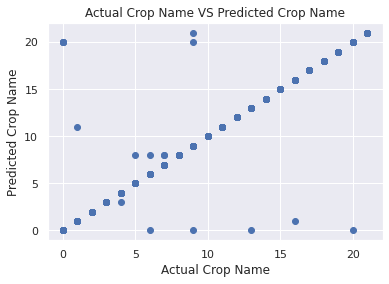

In [1861]:
plt.scatter(Y_test, lgb_predictions)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

Random Forest

In [1862]:
clf_random_forest=RandomForestClassifier()
clf_random_forest.fit(X_train, Y_train)

RandomForestClassifier()

Train Data

In [1863]:
random_forest_text_predictions = clf_random_forest.predict(X_train)
# print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy Score : ', accuracy_score(Y_train,random_forest_text_predictions)*100,'\n')
print(classification_report(Y_train,random_forest_text_predictions))

Accuracy Score :  100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00        68
           4       1.00      1.00      1.00        63
           5       1.00      1.00      1.00        66
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00        73
           8       1.00      1.00      1.00        72
           9       1.00      1.00      1.00        69
          10       1.00      1.00      1.00        73
          11       1.00      1.00      1.00        72
          12       1.00      1.00      1.00        71
          13       1.00      1.00      1.00        75
          14       1.00      1.00      1.00        73
          15       1.00      1.00      1.00        70
          16       1.00      1.00      1.00        68
 

Test data

In [1864]:
random_forest_text_predictions = clf_random_forest.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')
print(classification_report(Y_test,random_forest_text_predictions))

Accuracy Score :  99.10313901345292 

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        37
           5       1.00      0.97      0.99        34
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        27
           8       0.97      1.00      0.98        28
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00

In [1865]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_forest_text_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_forest_text_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_forest_text_predictions))))

Mean_absolute_error:  0.15396113602391628
Mean_squared_error:  3.0029895366218238
Root mean_squared_error:  1.73291359756389


Checking Actual Crop Name and Predicted Crop Name

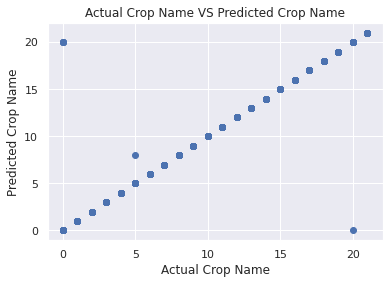

In [1866]:
plt.scatter(Y_test, random_forest_text_predictions)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

CatBoostClassifier

In [1867]:
cat = CatBoostClassifier()
cat.fit(X_train, Y_train)

Learning rate set to 0.080936
0:	learn: 2.5439590	total: 24.4ms	remaining: 24.4s
1:	learn: 2.2045409	total: 46.8ms	remaining: 23.3s
2:	learn: 1.9391262	total: 68.8ms	remaining: 22.9s
3:	learn: 1.7643804	total: 90.4ms	remaining: 22.5s
4:	learn: 1.6049607	total: 112ms	remaining: 22.3s
5:	learn: 1.4625704	total: 134ms	remaining: 22.1s
6:	learn: 1.3455148	total: 156ms	remaining: 22.1s
7:	learn: 1.2356902	total: 177ms	remaining: 22s
8:	learn: 1.1422152	total: 208ms	remaining: 22.9s
9:	learn: 1.0654536	total: 231ms	remaining: 22.8s
10:	learn: 0.9838958	total: 253ms	remaining: 22.7s
11:	learn: 0.9223679	total: 275ms	remaining: 22.6s
12:	learn: 0.8569027	total: 297ms	remaining: 22.5s
13:	learn: 0.8042090	total: 318ms	remaining: 22.4s
14:	learn: 0.7546769	total: 340ms	remaining: 22.3s
15:	learn: 0.7126564	total: 366ms	remaining: 22.5s
16:	learn: 0.6725814	total: 389ms	remaining: 22.5s
17:	learn: 0.6361568	total: 414ms	remaining: 22.6s
18:	learn: 0.6022531	total: 435ms	remaining: 22.5s
19:	learn

In [1868]:
cat_pred = cat.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,cat_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')
print(classification_report(Y_test,cat_pred))

Accuracy Score :  98.80418535127056 

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        37
           5       1.00      0.97      0.99        34
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        27
           8       0.97      1.00      0.98        28
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00

In [1869]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, cat_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, cat_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, cat_pred))))

Mean_absolute_error:  0.18834080717488788
Mean_squared_error:  3.6143497757847536
Root mean_squared_error:  1.9011443332332119


Checking Actual Crop Name and Predicted Crop Name

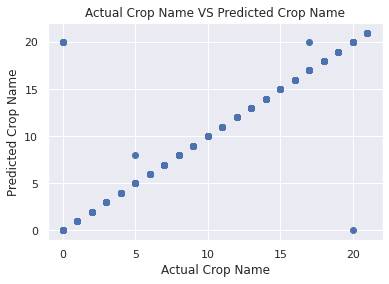

In [1870]:
plt.scatter(Y_test, cat_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

XGBClassifier

In [1871]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(objective='multi:softprob')

In [1872]:
xgb_pred = xgb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,xgb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')
print(classification_report(Y_test,xgb_pred))

Accuracy Score :  98.05680119581464 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        37
           5       0.97      0.97      0.97        34
           6       1.00      1.00      1.00        31
           7       0.93      0.96      0.95        27
           8       0.96      0.93      0.95        28
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        27
          11       1.00      0.96      0.98        28
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00

In [1873]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, xgb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, xgb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, xgb_pred))))

Mean_absolute_error:  0.2645739910313901
Mean_squared_error:  4.955156950672646
Root mean_squared_error:  2.226018182915999


Checking Actual Crop Name and Predicted Crop Name

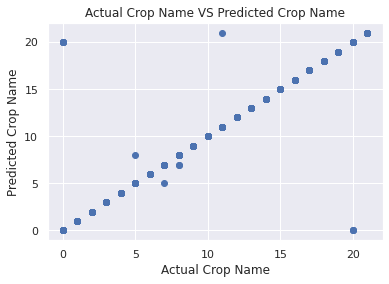

In [1874]:
plt.scatter(Y_test, xgb_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

LogisticRegression

In [1875]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [1876]:
log_reg_pred = log_reg.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,log_reg_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')
print(classification_report(Y_test,log_reg_pred))

Accuracy Score :  94.02092675635276 

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.83      0.71      0.77        28
           2       0.95      1.00      0.97        36
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        37
           5       0.82      0.79      0.81        34
           6       0.94      1.00      0.97        31
           7       0.81      0.78      0.79        27
           8       0.96      0.89      0.93        28
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        27
          11       0.97      1.00      0.98        28
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00

In [1877]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, log_reg_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, log_reg_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, log_reg_pred))))

Mean_absolute_error:  0.617339312406577
Mean_squared_error:  10.784753363228699
Root mean_squared_error:  3.2840148238442377


Checking Actual Crop Name and Predicted Crop Name

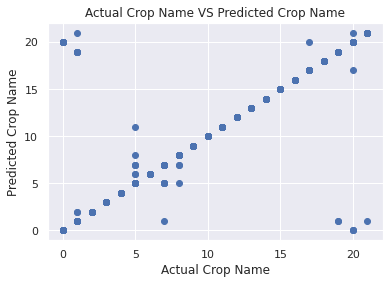

In [1878]:
plt.scatter(Y_test, log_reg_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

GaussianNB

In [1879]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [1880]:
gnb_pred = gnb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,gnb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')
print(classification_report(Y_test,gnb_pred))

Accuracy Score :  98.35575485799701 

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       1.00      0.93      0.96        28
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00

In [1881]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, gnb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, gnb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, gnb_pred))))

Mean_absolute_error:  0.27204783258594917
Mean_squared_error:  5.3841554559043345
Root mean_squared_error:  2.3203783001709732


Checking Actual Crop Name and Predicted Crop Name

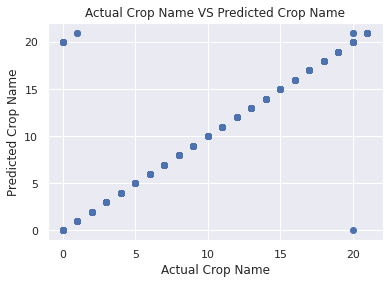

In [1882]:
plt.scatter(Y_test, gnb_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

KNeighborsClassifier

In [1883]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [1884]:
knn_pred = knn.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,knn_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')
print(classification_report(Y_test,knn_pred))

Accuracy Score :  96.8609865470852 

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       1.00      0.93      0.96        28
           2       1.00      1.00      1.00        36
           3       0.86      1.00      0.93        32
           4       1.00      0.89      0.94        37
           5       1.00      0.91      0.95        34
           6       1.00      1.00      1.00        31
           7       0.96      1.00      0.98        27
           8       0.90      0.96      0.93        28
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00 

In [1885]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, knn_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, knn_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, knn_pred))))

Mean_absolute_error:  0.3004484304932735
Mean_squared_error:  5.349775784753363
Root mean_squared_error:  2.312958232384096


Checking Actual Crop Name and Predicted Crop Name

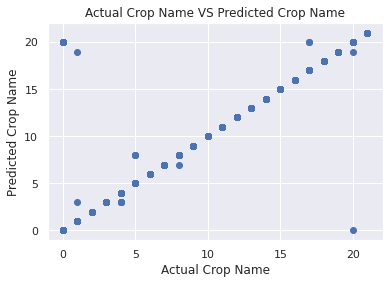

In [1886]:
plt.scatter(Y_test, knn_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

Support Vector Clustering (SVC)

In [1887]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [1888]:
svc_pred = svc.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')
print(classification_report(Y_test,svc_pred))

Accuracy Score :  96.26307922272048 

              precision    recall  f1-score   support

           0       1.00      0.66      0.79        32
           1       1.00      0.89      0.94        28
           2       1.00      1.00      1.00        36
           3       0.89      1.00      0.94        32
           4       1.00      0.92      0.96        37
           5       1.00      0.85      0.92        34
           6       1.00      1.00      1.00        31
           7       0.96      1.00      0.98        27
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00

In [1889]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, svc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, svc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, svc_pred))))

Mean_absolute_error:  0.42451420029895365
Mean_squared_error:  7.656203288490284
Root mean_squared_error:  2.7669845117908203


Checking Actual Crop Name and Predicted Crop Name

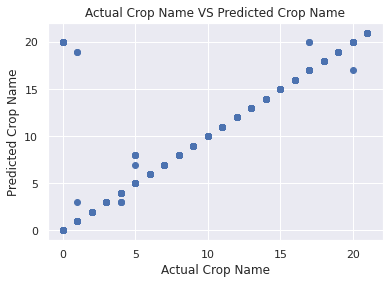

In [1890]:
plt.scatter(Y_test, svc_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

In [1891]:
print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')

Accuracy Score :  97.45889387144993 

Accuracy Score :  99.10313901345292 

Accuracy Score :  98.80418535127056 

Accuracy Score :  98.05680119581464 

Accuracy Score :  94.02092675635276 

Accuracy Score :  98.35575485799701 

Accuracy Score :  96.8609865470852 

Accuracy Score :  96.26307922272048 

